# Assignment-Logistic Regression

## Libraries and Packages

In [86]:
# import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn packages and libraries
from sklearn.linear_model import LogisticRegression

# processing packages
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

# metrics
# classifications
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss # pending

# important libraries 
import time
import warnings
warnings.filterwarnings('ignore')

# saving the model
import pickle

# streamlit application 
import streamtlit as st

In [2]:
# display proterties
pd.set_option('display.max_columns',None)

## Load dataset

In [3]:
# load the dataset 
dataset = pd.read_csv('Titanic_train.csv')

# loading testing dataset
testing_dataset = pd.read_csv('Titanic_test.csv')

# view sample dataset
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S


In [4]:
# view sample testing data
testing_dataset.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
274,1166,3,"Saade, Mr. Jean Nassr",male,NaN,0,0,2676,7.225,NaN,C
383,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.100,NaN,S
43,935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.000,NaN,S
340,1232,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.500,NaN,S
107,999,3,"Ryan, Mr. Edward",male,NaN,0,0,383162,7.750,NaN,Q


## Perform basic Data Validation checks

In [5]:
# print the dimension\shape of the dataset
print(f'Shape of the training dataset is {dataset.shape}\n')

# print the shape of testing dataset
print(f'Shape of the testing dataset is {testing_dataset.shape} ')

Shape of the training dataset is (891, 12)

Shape of the testing dataset is (418, 11) 


In [6]:
# print the basic info of the dataset
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 285.6 KB


**Observations**

1. As we can see that we have 12 columns in the training dataset with 7 features that are numeric and 5 features that are categorical in nature. We have missing values in the training dataset that needs to be handle appropriately.


2. **Target column is Survived**  

3. Features like **PassengerID, Ticket and Name** which are identifier features and can be dropped as we cannot use them for model trainig or EDA.

In [7]:
# basic info of the testing data
testing_dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 131.0 KB


Features in the testing dataset is also similar to the training dataset. But we have Null values in the testing data for features **Age and Cabin** which needs to be handle appropriately.

Target column is **Survived** which is not present in the testing dataset, hence model evaluation on the testing data will be tough.

**Check for Missing Values**

In [8]:
# check for any np.nan or missing values in the dataset
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# percentage of the missing value in the dataset
dataset.isnull().sum()/len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

We will have to drop the column **Cabin** as it has 77% of the missing values and for **Age** we can simply impute the **Median** value in place of missing values.

**Embarked** can be imputed with the mode values as it's a categorical in nature.

In [10]:
# drop the feature Cabin
dataset.drop(columns= ['Cabin'], axis = 1, inplace = True)

# impute values 
dataset.fillna({'Age':dataset['Age'].median(),
               'Embarked': dataset['Embarked'].mode()[0]}, inplace = True)

# print the sample 
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# missing values in the testing data
testing_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We will be replicating the changes made in the training data to the testing data. In addition to the **Age** and **Cabin** we have missing value in the **Fare** too, but as the testing data is unknow in real world scenario we will have to impute the values using the statistical values of the training data and not the testing data, i.e. we will use **median and mode** from the training data to impute values in the **testing data**.


We are using Median values instead of Mean as Median is not effected because of the outliers in the feature.

In [12]:
# drop the column Cabin
testing_dataset.drop(columns=['Cabin'], axis=1, inplace=True)

# impute the missing values in testing data
testing_dataset.fillna({'Age':dataset['Age'].median(),
                       'Fare':dataset['Fare'].median()},
                      inplace = True)

# check for missing values
testing_dataset.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Check for duplicate Values**

In [13]:
# check for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [14]:
# check for duplicate values in the testing data
print(f'Count of duplicate values in the training data {dataset.duplicated().sum()}\n')
print(f'Count of duplicate values in testing data {testing_dataset.duplicated().sum()}')


Count of duplicate values in the training data 0

Count of duplicate values in testing data 0


In [15]:
# print the column name, datatype and unique values in the feature
for col in dataset.columns:
    print(col, f"[{dataset[col].dtype}] : ", dataset[col].nunique())
    if dataset[col].nunique()>10:
        print(f'Count of unique values is more than 15\n')
    else:
        print(dataset[col].unique(),'\n')

PassengerId [int64] :  891
Count of unique values is more than 15

Survived [int64] :  2
[0 1] 

Pclass [int64] :  3
[3 1 2] 

Name [object] :  891
Count of unique values is more than 15

Sex [object] :  2
['male' 'female'] 

Age [float64] :  88
Count of unique values is more than 15

SibSp [int64] :  7
[1 0 3 4 2 5 8] 

Parch [int64] :  7
[0 1 2 5 3 4 6] 

Ticket [object] :  681
Count of unique values is more than 15

Fare [float64] :  248
Count of unique values is more than 15

Embarked [object] :  3
['S' 'C' 'Q'] 



**Dropping Identifier Features**

Features like **PassengerID, Ticket and Name** cannot be used for analysis or for model training, and hence can be dropped from both training and testing dataset.

In [16]:
# drop PassengerID and Name feature 
dataset.drop(columns= ['PassengerId','Name','Ticket'], axis = 1, inplace = True)

# drop PassengerId and Name feature from testing data
testing_dataset.drop(columns= ['PassengerId','Name','Ticket'], axis = 1, inplace = True)

# view the sample dataset
dataset.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
93,0,3,male,26.0,1,2,20.5750,S
510,1,3,male,29.0,0,0,7.7500,Q
52,1,1,female,49.0,1,0,76.7292,C
344,0,2,male,36.0,0,0,13.0000,S
38,0,3,female,18.0,2,0,18.0000,S


## Define Target Column

We will try to predict the **Survived** column in the training dataset.

Let's see the value distribution in the dataset

In [17]:
# value distribution of the target column
dataset['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

We can see that the values are distributed fairly with 61% of 0 and 1 being around 38%.

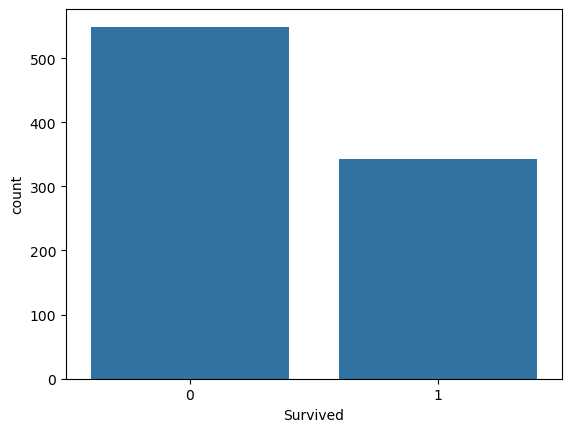

In [18]:
sns.countplot(x = 'Survived', data = dataset)
plt.show()

We don't have imbalance in the target column **Survived** but still we will try to train the model with dataset that have equal distribution of the data.

-------------------------------------------------------------------------------

# Exploratory Data Analysis

We will be performing EDA for each feature in the dataset and try to see following things for the dataset.

    1. Statistical values (mean, median, mode, standard deviation)
    2. Quartile ranges.
    3. skewness in the feature.
    4. Visualization.

In [21]:
def basic_statistic(dataset, column):
    basic_stats = pd.Series([dataset[column].mean(),
                             dataset[column].median(),
                             dataset[column].mode().to_list(),
                             np.std(dataset[column]),
                            dataset[column].min(),
                            dataset[column].quantile(0.25),
                            dataset[column].quantile(0.5),
                            dataset[column].quantile(0.75),
                            dataset[column].max(),
                            dataset[column].quantile(0.75)-dataset[column].quantile(0.25),
                            dataset[column].skew()],
                            index = ['Mean','Median','Mode','Std','Min','25%','50%',
                                    '75%','Max','IQR','Skewness'])
    
    return basic_stats

In [33]:
# # numerical feature visualization
# def numerical_summary_plot(feature_name, descriptive_name, dataset):
#     fig, axs = plt.subplots(3,1, figsize = (12,8))
    
#     # Plot A: Histogram plot
#     sns.distplot(dataset[feature_name], ax = axs[0], kde = True)
#     axs[0].set_title(f'Histogram Plot for {descriptive_name}')
#     axs[0].grid()
    
#     # Plot B: Distribution Plot
#     sns.kdeplot(dataset[feature_name], ax = axs[1], fill = True)
#     axs[1].set_title(f'Distribution Plot for {descriptive_name}')
#     axs[1].grid()
    
#     # Plot C: Box Plot for outlier identification
#     sns.boxplot(x = dataset[feature_name], ax = axs[2])
#     axs[2].set_title(f'Box Plot for {descriptive_name}')
#     axs[2].grid()
    
#     plt.tight_layout()
#     plt.show()

In [20]:
def feature_summary_continuous(feature_name, descriptive_name, continuous, dataset, target = None):
    
    # for continuous feature
    if continuous:
        fig, axs = plt.subplots(4,1, figsize = (12,14))
        
    # for descrete or categorical feature - not in use for the current code, separate function developed.
    else:
        fig, axs = plt.subplots(2,1,figsize = (12,8))
        
    # calculation for continuous feature
    if continuous:    
        mean_val = dataset[feature_name].mean()
        median_val = dataset[feature_name].median()
        Q1,Q3 = dataset[feature_name].quantile([0.25,0.75])
    
    # calculation for categorical or descrete feature - separate function developed.
    else:
        pass
        
    # Plot A: Histogram plot
    sns.histplot(dataset[feature_name], bins = 'auto', ax = axs[0],edgecolor="black",color="#407294", kde = True)
    axs[0].axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.1f}")
    axs[0].axvline(median_val, color = 'green', linestyle = '-.', label=f"Median: {median_val:.1f}")
    axs[0].set_title(f'Histogram Plot for {descriptive_name}',fontdict = {'fontsize':14,'fontweight':'bold'})
    axs[0].set_xlabel(descriptive_name, fontsize=14)
    axs[0].set_ylabel("Frequency", fontsize=14)
    axs[0].legend()
    axs[0].grid(True, linestyle="--", alpha=0.9)
    
    # Plot B: Distribution Plot
    sns.kdeplot(dataset[feature_name], ax = axs[1], fill = True, color="#407294", alpha=0.5)
    axs[1].axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.1f}")
    axs[1].axvline(median_val, color = 'green', linestyle = '-.', label=f"Median: {median_val:.1f}")
    axs[1].set_title(f'Distribution Plot for {descriptive_name}',fontsize=14, fontweight='bold')
    axs[1].set_xlabel(descriptive_name, fontsize=14)
    axs[1].set_ylabel("Density", fontsize=14)
    axs[1].legend(loc = 'upper left')
    axs[1].grid(True, linestyle="--", alpha=0.9)
    
    # Plot C: Box Plot for outlier identification
    sns.boxplot(x = dataset[feature_name], ax = axs[2],palette="pastel")
    axs[2].set_title(f'Box Plot for {descriptive_name}',fontdict = {'fontsize':14,'fontweight':'bold'})
    axs[2].set_ylabel(descriptive_name, fontsize=12)
    axs[2].set_xlabel(f'Values', fontsize = 12)
    axs[2].grid(True, linestyle="--", alpha=0.9)
    
#     # Plot D: Violin Plot
#     sns.violinplot(x = dataset[feature_name], ax = axs [3],inner="quartile",palette="pastel")
#     axs[3].axvline(Q1, color='red', linestyle='--', label=f"Q1: {Q1:.1f}")
#     axs[3].axvline(median_val, linestyle = '-.', label=f"Median: {median_val:.1f}")
#     axs[3].axvline(Q3, color = 'green', linestyle = '-.', label=f"Q3: {Q3:.1f}")
#     axs[3].set_ylabel(descriptive_name, fontsize=14)
#     axs[3].set_xlabel(f'Values', fontsize = 14,)
#     axs[3].set_title(f'Violin Plot for {descriptive_name}',fontsize=16, fontweight='bold')
#     axs[3].legend(loc = 'upper left')
#     axs[3].grid(True, linestyle="--", alpha=0.9)

    if target is not None:

#         # Bivariate Analysis
#         # Plot D: Scatter Plot - Comparison of Numerical feature with Numerical Target.
#         sns.scatterplot(x = feature_name, y = target, data = dataset, ax = axs[3])
#         axs[3].set_title(f'Scatter plot for {descriptive_name} vs {target}',fontdict = {'fontsize':14,'fontweight':'bold'})
#         axs[3].set_ylabel(descriptive_name, fontsize=12)
#         axs[3].set_xlabel(f'{target}', fontsize = 12)
#         axs[3].grid(True, linestyle="--", alpha=0.9)

        # Plot D: Bar Plot - Comparison between Numerical Feature and Categorical Feature
        sns.boxplot(x = target, y= feature_name, data = dataset, ax = axs[3])
        axs[3].set_title(f'box plot for {descriptive_name} vs {target}',fontdict = {'fontsize':14,'fontweight':'bold'})
        axs[3].set_ylabel(descriptive_name, fontsize=12)
        axs[3].set_xlabel(f'{target}', fontsize = 12)
        axs[3].grid(True, linestyle="--", alpha=0.9)
    
    plt.tight_layout()
    plt.show()

In [19]:
def categorical_summart_plot(feature_name, dataset, target = None):
    
    # know the value distribution of the data
    count = dataset[feature_name].value_counts()
    
    # figure and its size
    fig, axs = plt.subplots(1,2,figsize = (10,4))
    
    # Plot A: Count Plot
    sns.countplot(x = feature_name, data = dataset, order = count.index,palette = "viridis", ax = axs[0])
    axs[0].set_xlabel(f'{feature_name}', fontsize = 12)
    axs[0].set_ylabel('Count', fontsize = 12)
#     axs[0].set_xticklabels(count.index, rotation=45, ha = 'center')
    axs[0].set_title(f'Count Plot of {feature_name}',fontdict = {'fontsize':14,'fontweight':'bold'})
    
    # Plot B: Pie Plot
    axs[1].pie(x = count, labels = count.index, autopct = '%.1f%%',startangle=90, colors=sns.color_palette("viridis", len(count)))
    axs[1].set_title(f'Proportion plot of {feature_name}', fontsize = 14,fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Bivariate Analysis 
    # Box plot for feature vs target.
    if target is not None:
        # Plot C: Box Plot - Categorical feature - Numerical Target 
#         plt.figure(figsize = (10,4))
#         sns.boxplot(x = feature_name,y = target , data = dataset,order = count.index, palette="viridis")
#         plt.ylabel(f'{target}', fontsize = 12)
#         plt.xlabel(f'{feature_name}', fontsize = 12)
#         plt.title(f"Box plot for {feature_name} vs {target}",fontdict = {'fontsize':14,'fontweight':'bold'})
#         plt.tight_layout()
#         plt.show()
        
        
        # Plot C: Count Plot with Hue: Categorical Feature - Categorical Target
        plt.figure(figsize = (10,4))
        sns.countplot(x = feature_name,hue = target , data = dataset, palette="viridis")
#         plt.ylabel(f'{target}', fontsize = 12)
        plt.xlabel(f'{feature_name}', fontsize = 12)
        plt.title(f"Count plot for {feature_name} vs {target}",fontdict = {'fontsize':14,'fontweight':'bold'})
        plt.tight_layout()
        plt.show()
        


We will being the above mentioned function to easily perform the statistical analysis and visualization of the features.

### Pclass

In [22]:
# values in the feature
dataset['Pclass'].sample(5)

680    3
456    1
563    3
147    3
459    3
Name: Pclass, dtype: int64

In [23]:
# count of each categories
dataset['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

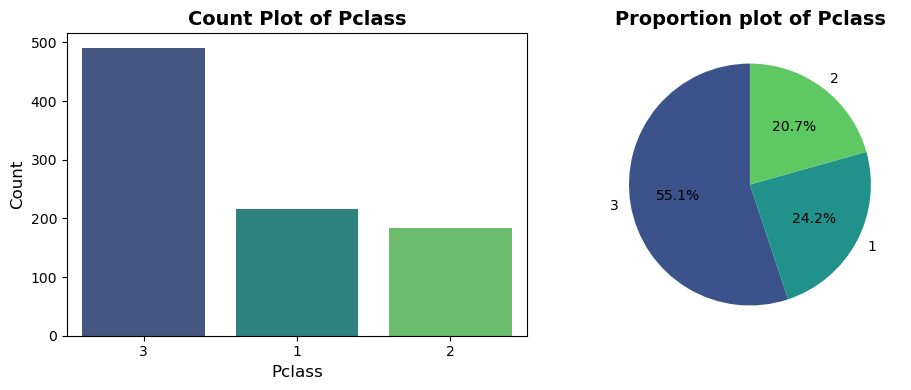

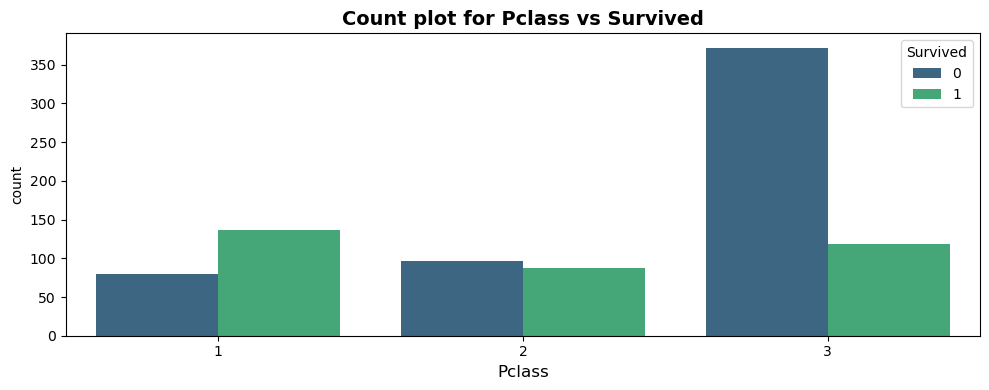

In [24]:
# visualization for the feature
categorical_summart_plot('Pclass', dataset, target = 'Survived')

**Observation**

   1. **PClass** a categorical feature having 3 categories.
   2. Higher % of survival rate in 2nd class and least in 3rd class.
   3. Higher number of passenger in 3rd class compared to any other class.

### Sex

In [25]:
# values in the feature
dataset['Sex'].sample(5)

872      male
592      male
144      male
494      male
44     female
Name: Sex, dtype: object

In [26]:
# count of each categories
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

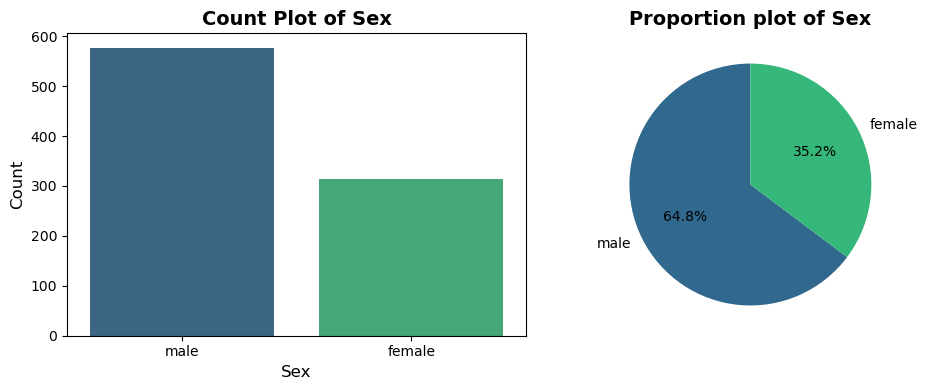

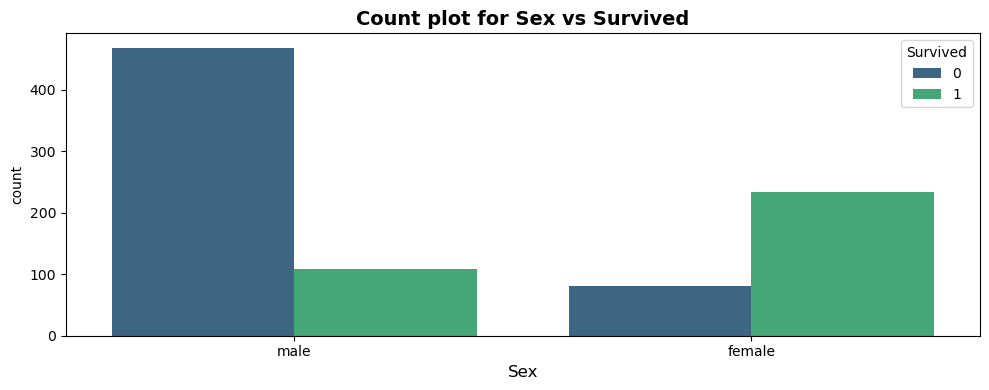

In [27]:
# visualization for the feature
categorical_summart_plot('Sex', dataset,'Survived')

**Obsevation**

1. Categorical category having two categories Male and Female namely.
2. Higher rate of survival in Females compared to Males.
3. Close to 65% are males and rest are females.

### Age

In [28]:
# values in the feature
dataset['Age'].sample(5)

549     8.0
404    20.0
576    34.0
617    26.0
647    56.0
Name: Age, dtype: float64

In [29]:
# basic statistics of the feature
basic_statistic(dataset,'Age')

Mean        29.361582
Median           28.0
Mode           [28.0]
Std         13.012388
Min              0.42
25%              22.0
50%              28.0
75%              35.0
Max              80.0
IQR              13.0
Skewness     0.510245
dtype: object

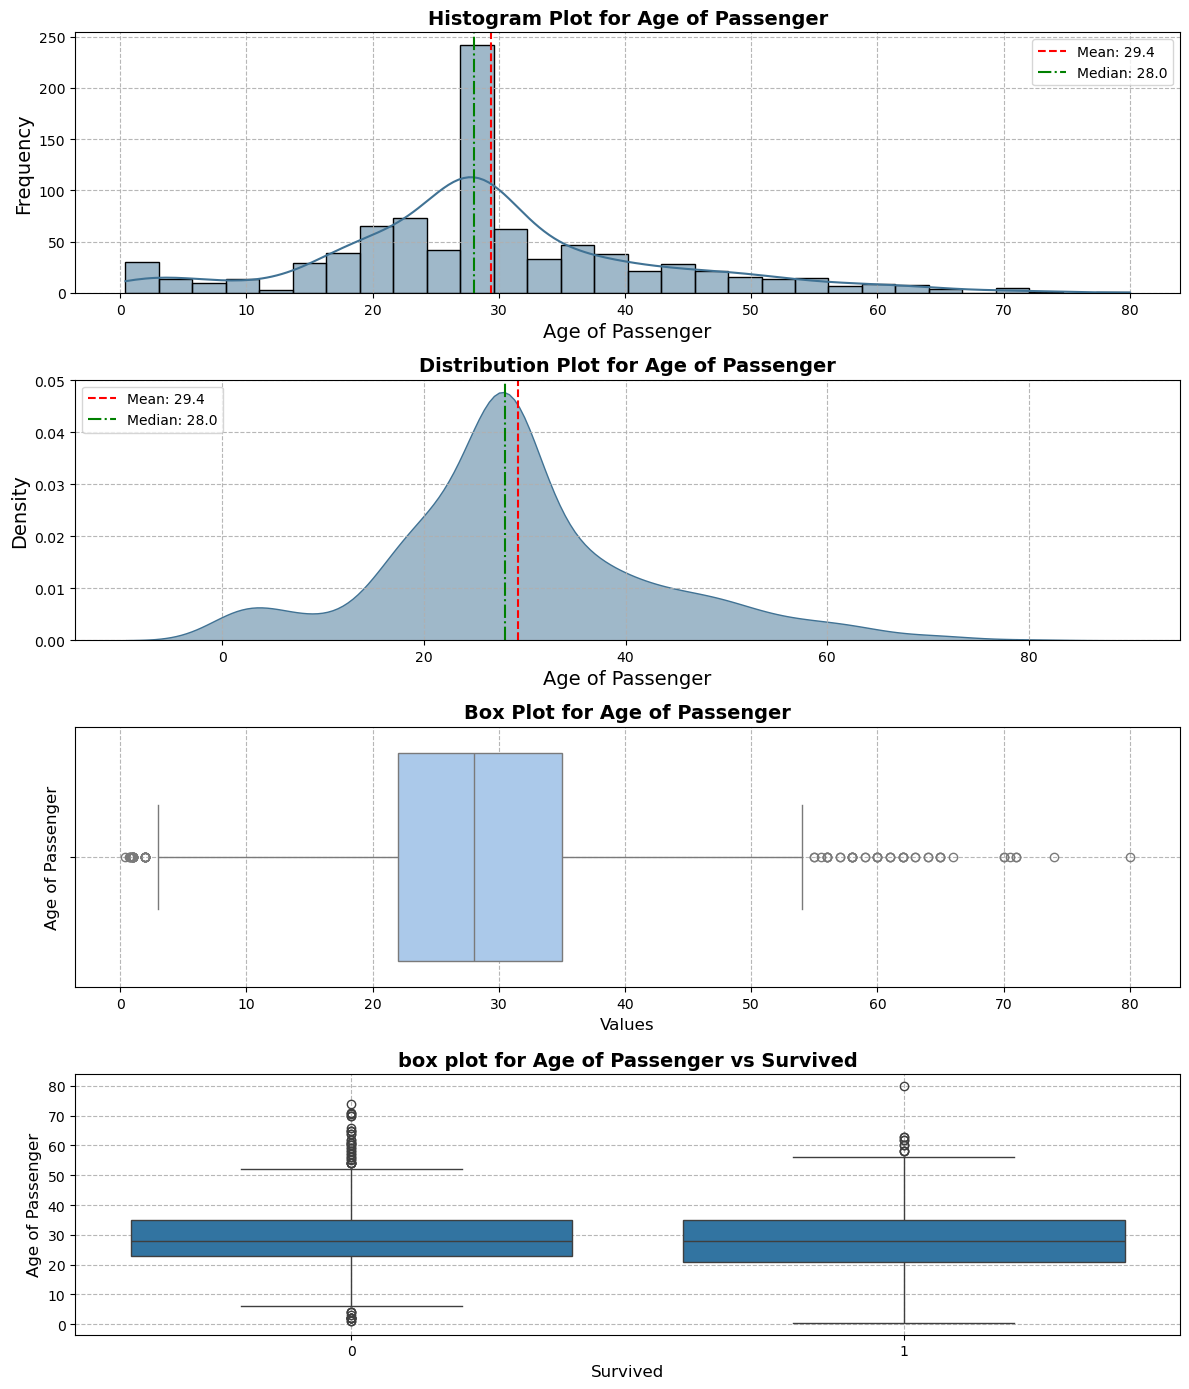

In [34]:
# visualization for the feature
feature_summary_continuous('Age','Age of Passenger',True, dataset,'Survived')

**Observation**

1. Feature is normally distributed.
2. Outliers are present in the feature.

### SibSp

In [35]:
# values in the feature
dataset['SibSp'].sample(5)

440    1
695    0
861    1
590    0
111    1
Name: SibSp, dtype: int64

In [36]:
# count of each categories
dataset['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

After 2, values are very insignificant. We should club the values above 2 and consider it as a category with 2 or 2+more.

In [37]:
#  the values for 2 or more 
dataset['SibSp'] = dataset['SibSp'].apply(lambda x: 2 if x>=2 else x)

In [38]:
# display the new count of categories
dataset['SibSp'].value_counts()

SibSp
0    608
1    209
2     74
Name: count, dtype: int64

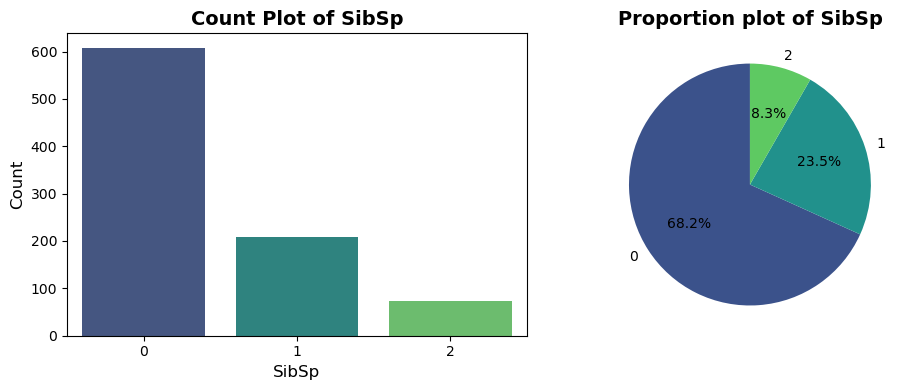

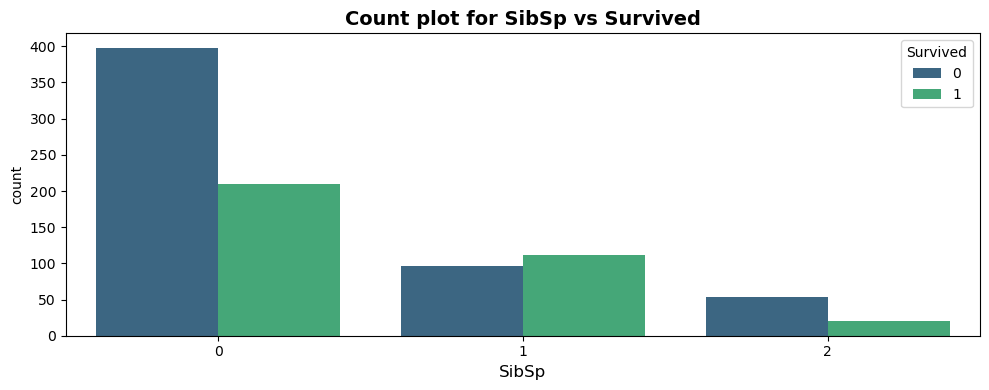

In [39]:
# visualization of the feature
categorical_summart_plot('SibSp', dataset, 'Survived')

**Observation**

1. SibSp is a categories describing the siblings present with the ticket holder.
2. Survival rate for people with 1 sibling is positive.

### Parch

In [40]:
# values present in the feature
dataset['Parch'].sample(5)

487    0
630    0
714    0
592    0
118    1
Name: Parch, dtype: int64

In [41]:
# count of each categories in feature
dataset['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

As the values after 2 are very insignificant compared to other, we should club them and cosider it as a categories with 2 or 2+more.

In [42]:
dataset['Parch'] = dataset['Parch'].apply(lambda x: 2 if x>=2 else x)

In [43]:
# value of new cateogires
dataset['Parch'].value_counts()

Parch
0    678
1    118
2     95
Name: count, dtype: int64

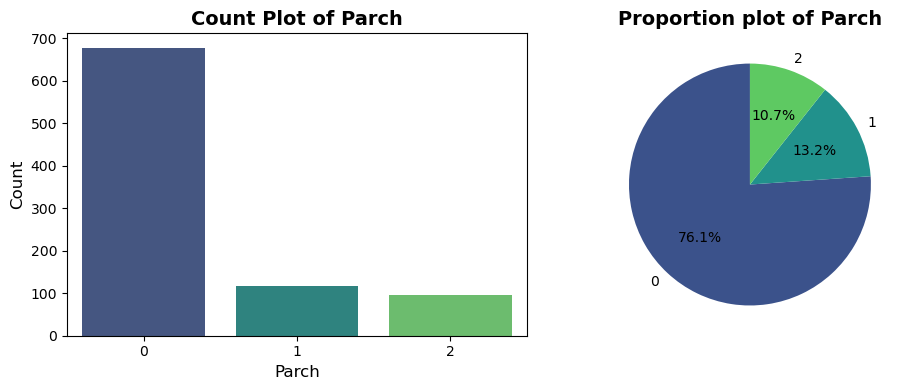

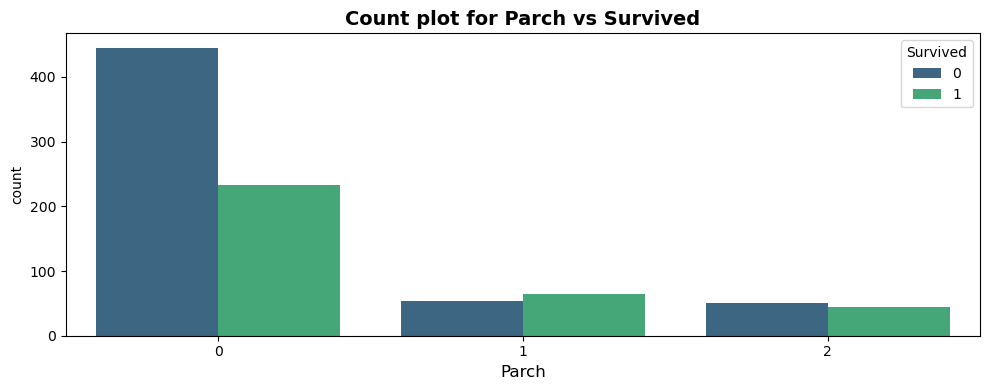

In [44]:
# visualization for the feature
categorical_summart_plot('Parch', dataset, target='Survived')

**Observation**

1. Parch is categorical feature with categories 0,1,2
2. Survival for 1 is higher compared to other categories in the feature.

### Fare

In [47]:
# values in the dataset
dataset['Fare'].sample(5)

132    14.5000
402     9.8250
135    15.0458
653     7.8292
860    14.1083
Name: Fare, dtype: float64

In [48]:
# statistics of the feature
basic_statistic(dataset,'Fare')

Mean        32.204208
Median        14.4542
Mode           [8.05]
Std         49.665534
Min               0.0
25%            7.9104
50%           14.4542
75%              31.0
Max          512.3292
IQR           23.0896
Skewness     4.787317
dtype: object

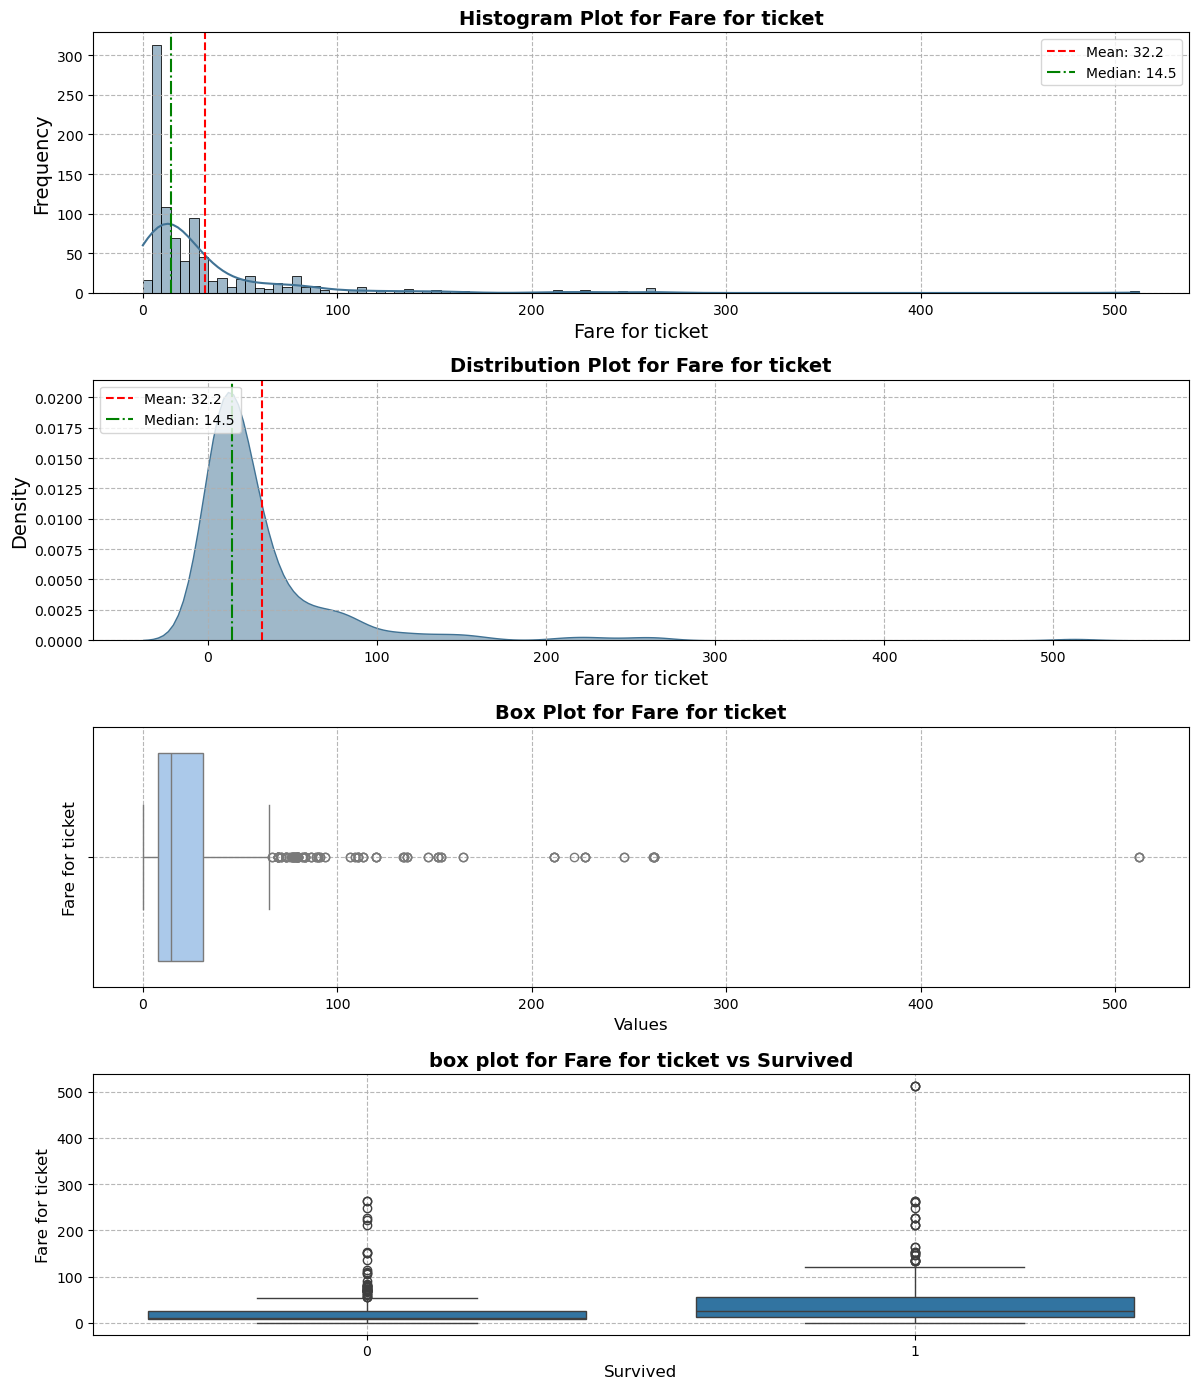

In [49]:
# visualization for the feature
feature_summary_continuous('Fare','Fare for ticket', True, dataset,'Survived')

**Observation**

1. Feature is highly right skewed.
2. Outliers are present in the feature.
3. Higher the Fare, Higher the survival chances.

### Embarked

In [50]:
# values in the feature
dataset['Embarked'].sample(5)

570    S
397    S
627    S
498    S
731    C
Name: Embarked, dtype: object

In [51]:
# value count of each categories in the feature
dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

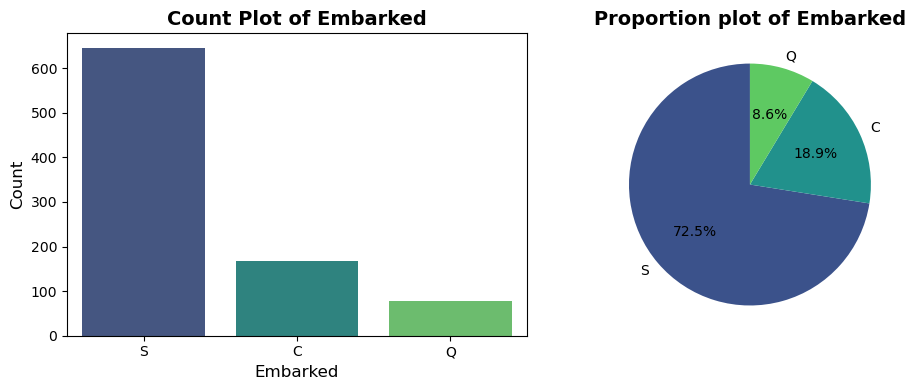

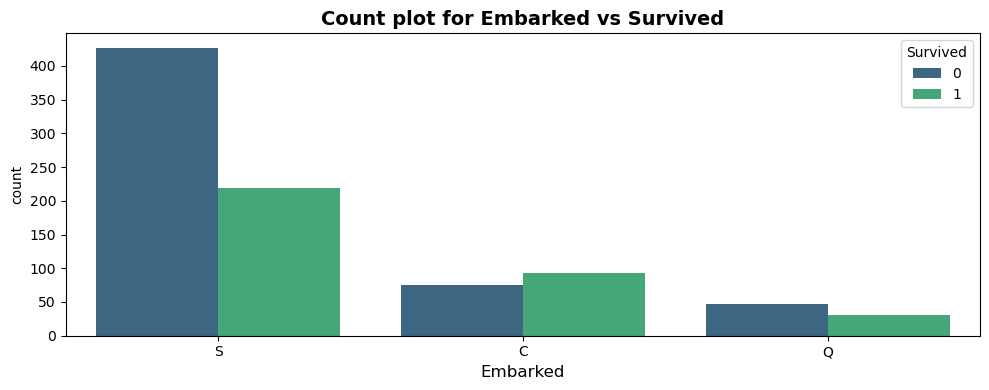

In [52]:
# visualization
categorical_summart_plot('Embarked',dataset,'Survived')

**Observation**

1. Survival is highest in C categories passenger.
2. Where as the survival for the S categories is very low and for Q categories is still higher compared to S.

## Feature Engineering 

Let's few the datatype and unique values present in each feature of the dataset.

In [53]:
# show feature and unique values present
for col in dataset.columns:
    print(col.upper(), " : ", dataset[col].dtype, dataset[col].nunique())
    if dataset[col].nunique()>10:
        print('Count is more than 10\n')
    else:
        print(dataset[col].unique(),'\n')

SURVIVED  :  int64 2
[0 1] 

PCLASS  :  int64 3
[3 1 2] 

SEX  :  object 2
['male' 'female'] 

AGE  :  float64 88
Count is more than 10

SIBSP  :  int64 3
[1 0 2] 

PARCH  :  int64 3
[0 1 2] 

FARE  :  float64 248
Count is more than 10

EMBARKED  :  object 3
['S' 'C' 'Q'] 



**Handling Outliers**

In [54]:
# numerical columns 
numerical_columns = dataset.select_dtypes(exclude = ['object']).columns.to_list()
print(f'Numerical columns are {numerical_columns}')

# categorical columns
categorical_columns = dataset.select_dtypes(include = ['object']).columns.to_list()
print(f'Categorical Columns are {categorical_columns}')

Numerical columns are ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns are ['Sex', 'Embarked']


Out of these features with numerical datatype only **Age and Fare** is continuous in nature and has outliers present.Let's handle these outliers using winsorization method.

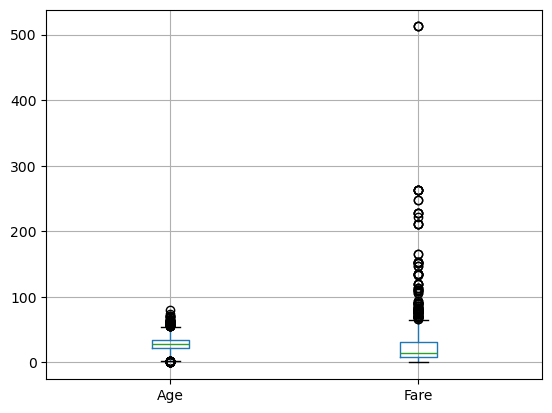

In [55]:
# visualize the outliers in the dataset
dataset[['Age','Fare']].boxplot()
plt.show()

In [56]:
# winsorization outlier capping technique
def outlier_capping(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR
    
    dataset[column] = dataset[column].apply(lambda x : lower_extreme if x< lower_extreme else upper_extreme if x>upper_extreme else x)
                                            

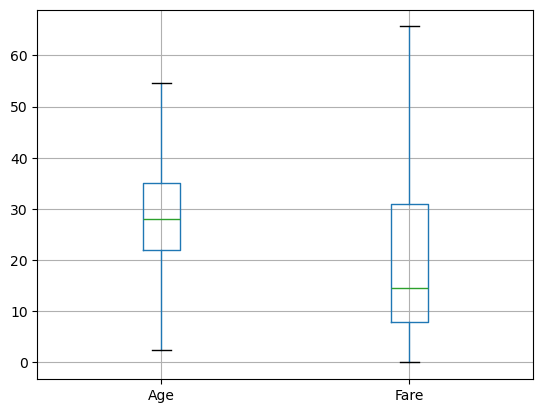

In [57]:
# capping the outliers
for col in ['Age','Fare']:
    outlier_capping(dataset,col)

# rechecking for outliers
dataset[['Age','Fare']].boxplot()
plt.show()

**Encoding**

In [58]:
# print categorical columns
for col in categorical_columns:
    print(col.upper())
    print(dataset[col].unique(),'\n')

SEX
['male' 'female'] 

EMBARKED
['S' 'C' 'Q'] 



Following features have categorical features that are not encoded. We will be using One-Hot encoding for these two features.

In [59]:
# pd.get_dummies method
dataset_encoded  = pd.get_dummies(dataset,columns = ['Sex','Embarked'], dtype='int', prefix = 'encoded',prefix_sep = '_', drop_first=True)

# view the sample dataset
dataset_encoded.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,encoded_male,encoded_Q,encoded_S
63,0,3,4.0,2,2,27.9000,1,0,1
357,0,2,38.0,0,0,13.0000,0,0,1
88,1,1,23.0,2,2,65.6344,0,0,1
148,0,2,36.5,0,2,26.0000,1,0,1
653,1,3,28.0,0,0,7.8292,0,1,0


## Feature Selection

**Correlation Matrix**

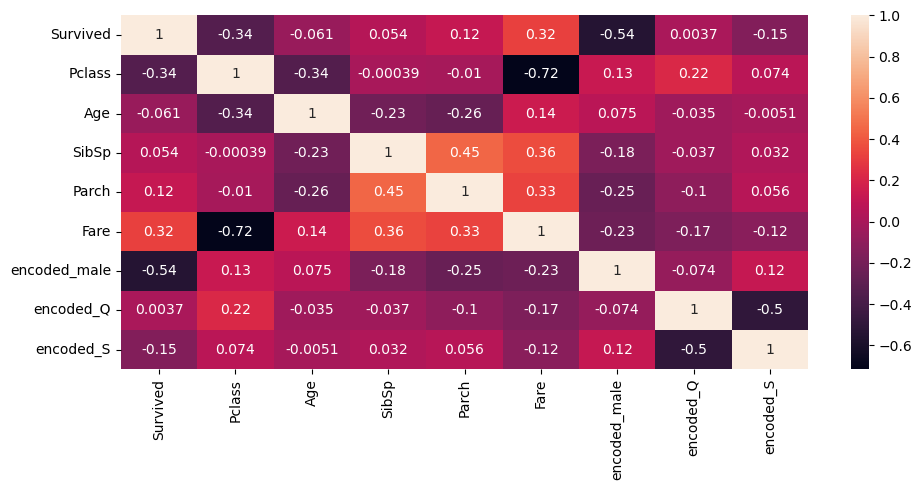

In [60]:
corr = dataset_encoded.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True)
plt.tight_layout()
plt.show()

**Observation**

1. High correlation with Survived
       
       a. encoded_male
2. Multicolinearity
    
       a. Fare with Pclass
       b. encoded_Q with encoded_S
       

**Define Target and Features**

In [61]:
# features
features = dataset.drop(columns=['Survived'], axis =1)

# target
target = dataset[['Survived']]

**Multicolinearity Test**

In [62]:
# import the package
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['features'] = dataset_encoded.columns
vif['VIF'] = [variance_inflation_factor(dataset_encoded.values, i) for i in range(len(dataset_encoded.columns))]

vif.sort_values(by = 'VIF', ascending = False)

,features,VIF
1,Pclass,7.846661
2,Age,6.573347
8,encoded_S,4.891855
5,Fare,4.555751
6,encoded_male,3.817949
0,Survived,2.180064
3,SibSp,2.098655
4,Parch,1.905082
7,encoded_Q,1.618373


We can see that multicolinearity for all the features is not more than 10. We can keep all these features in the dataset.

We can see that **Age** has very less importance compared to **Fare**

**F_classif**

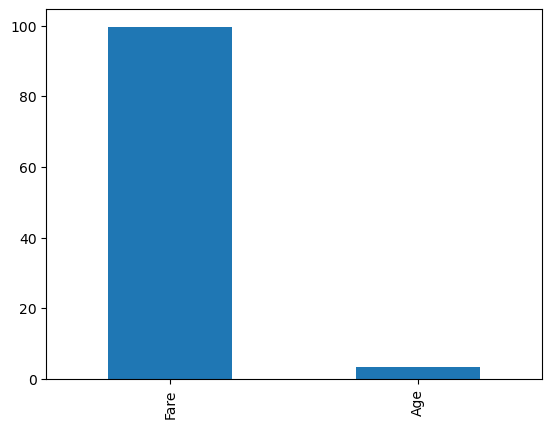

In [67]:
# import f_classif
from sklearn.feature_selection import f_classif

# perform f_classif
f_class = f_classif(dataset_encoded[['Age','Fare']], target)

# plot the above result
pd.Series(f_class[0], index = dataset_encoded[['Age','Fare']].columns).sort_values(ascending = False).plot(kind = 'bar')
plt.show()

We can see that **Age** has very less importance compared to **Fare**.

**Chi_square**

We will be performing Chi_square test for categorical feature importance.

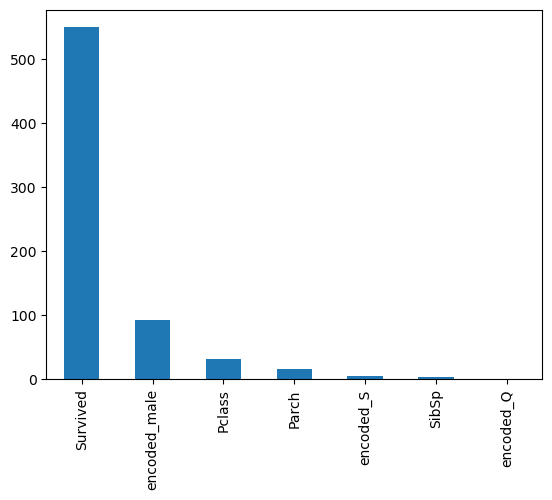

In [68]:
# import 
from sklearn.feature_selection import chi2

# perform chi2 test
chi2_result = chi2(dataset_encoded[['Survived', 'Pclass', 'SibSp', 'Parch', 'encoded_male','encoded_Q', 'encoded_S']],target)

# plot the above result
pd.Series(chi2_result[0], 
          index = dataset_encoded[['Survived','Pclass', 'SibSp', 'Parch',
                                   'encoded_male','encoded_Q',
                                   'encoded_S']].columns).sort_values(ascending = False).plot(kind = 'bar')

plt.show()

We can see that **encoded_s, SibSp and encoded_Q** have the least feature importance in this dataset.

In [223]:
# show the sample dataset_encoded
dataset_encoded.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,encoded_male,encoded_Q,encoded_S
268,1,1,54.5,0,1,65.6344,0,0,1
559,1,3,36.0,1,0,17.4000,0,0,1
750,1,2,4.0,1,1,23.0000,0,0,1
646,0,3,19.0,0,0,7.8958,1,0,1
560,0,3,28.0,0,0,7.7500,1,1,0


## Model Training 

**Train Test Split**

Define the target feature and independent features that will be passed as input features for model training.

In [69]:
# independent features
X = dataset_encoded.drop(columns = ['Survived'])
print(X.sample(5))
print('\n')

# target column
Y = dataset_encoded[['Survived']]
print(Y.sample(5))

     Pclass   Age  SibSp  Parch     Fare  encoded_male  encoded_Q  encoded_S
327       2  36.0      0      0  13.0000             0          0          1
383       1  35.0      1      0  52.0000             0          0          1
572       1  36.0      0      0  26.3875             1          0          1
189       3  36.0      0      0   7.8958             1          0          1
713       3  29.0      0      0   9.4833             1          0          1


     Survived
289         1
869         1
549         1
771         0
109         1


In [70]:
# train test split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 42)

# print the shape of training and testing data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 8)
(179, 8)
(712, 1)
(179, 1)


**Feature Scaling**

We will make use of Standard Scaler for feature scaling.

In [71]:
# initiate Standard Scaler
standard_scaler = StandardScaler()

# fit and transform the training data
X_train[['Age','Fare']] = standard_scaler.fit_transform(X_train[['Age','Fare']])

# transformt testing data 
X_test[['Age','Fare']] = standard_scaler.transform(X_test[['Age','Fare']])

# print the X_train and X_test
print(X_train.sample(5))
print('\n')
print(X_test.sample(5))

     Pclass       Age  SibSp  Parch      Fare  encoded_male  encoded_Q  \
220       3 -1.063957      0      0 -0.773180             1          0   
687       3 -0.817202      0      0 -0.669714             1          0   
160       3  1.239088      0      1 -0.380450             1          0   
656       3 -0.076938      0      0 -0.780703             1          0   
694       1  2.102730      0      0  0.129367             1          0   

     encoded_S  
220          1  
687          1  
160          1  
656          1  
694          1  


     Pclass       Age  SibSp  Parch      Fare  encoded_male  encoded_Q  \
120       2 -0.652699      2      0  2.036151             1          0   
507       1 -0.076938      0      0  0.129367             1          0   
350       3 -0.488196      0      0 -0.715856             1          0   
168       1 -0.076938      0      0  0.098875             1          0   
210       3 -0.405944      0      0 -0.821967             1          0   

     e

In [72]:
# initiate Standard Scaler
standard_scaler = StandardScaler()

# fit and transform the training data
X_train[['Fare']] = standard_scaler.fit_transform(X_train[['Fare']])

# transformt testing data 
X_test[['Fare']] = standard_scaler.transform(X_test[['Fare']])

# print the X_train and X_test
print(X_train.sample(5))
print('\n')
print(X_test.sample(5))

     Pclass       Age  SibSp  Parch      Fare  encoded_male  encoded_Q  \
395       3 -0.570447      0      0 -0.785582             1          0   
50        3 -1.804221      2      1  0.770297             1          0   
407       2 -2.133228      1      1 -0.251167             1          0   
614       3  0.498824      0      0 -0.773180             1          0   
361       2  0.005314      1      0  0.186486             1          0   

     encoded_S  
395          1  
50           1  
407          1  
614          1  
361          0  


     Pclass       Age  SibSp  Parch      Fare  encoded_male  encoded_Q  \
442       3 -0.323692      1      0 -0.786597             1          0   
668       3  1.156836      0      0 -0.773180             1          0   
250       3 -0.076938      0      0 -0.812209             1          0   
814       3  0.128691      0      0 -0.773180             1          0   
254       3  0.992333      0      2 -0.179817             0          0   

     e

**Model Training**

In [73]:
# initiate Logistic Regression
logistic_regression = LogisticRegression()

# fit the training data
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

**Model Evaluation**

In [74]:
# make predictions on training and testing data
y_pred_train = logistic_regression.predict(X_train)
y_pred_test = logistic_regression.predict(X_test)

# calculate accuaccuracy_score
accuracy_score_train = accuracy_score(y_pred_train,Y_train)
accuracy_score_test = accuracy_score(y_pred_test,Y_test)

# print the score
print(f'Accuracy Score for training is {accuracy_score_train} and for testing is {accuracy_score_test}')



Accuracy Score for training is 0.800561797752809 and for testing is 0.7988826815642458


**Log_loss**

In [75]:
logistic_regression.predict_proba(X_test)

array([[0.89151472, 0.10848528],
       [0.78913905, 0.21086095],
       [0.87316689, 0.12683311],
       [0.1156455 , 0.8843545 ],
       [0.27020053, 0.72979947],
       [0.06470123, 0.93529877],
       [0.33009917, 0.66990083],
       [0.91213748, 0.08786252],
       [0.25187836, 0.74812164],
       [0.08357643, 0.91642357],
       [0.64702473, 0.35297527],
       [0.9364491 , 0.0635509 ],
       [0.5627817 , 0.4372183 ],
       [0.85698937, 0.14301063],
       [0.8120101 , 0.1879899 ],
       [0.06303123, 0.93696877],
       [0.68309511, 0.31690489],
       [0.32999185, 0.67000815],
       [0.76449124, 0.23550876],
       [0.65257961, 0.34742039],
       [0.88659215, 0.11340785],
       [0.59236111, 0.40763889],
       [0.41248417, 0.58751583],
       [0.872282  , 0.127718  ],
       [0.89500196, 0.10499804],
       [0.91264054, 0.08735946],
       [0.52412158, 0.47587842],
       [0.78657849, 0.21342151],
       [0.89621598, 0.10378402],
       [0.43228002, 0.56771998],
       [0.

In [76]:
log_loss(y_pred_test,Y_test)

7.249002916247025

**Confusion Matrix**

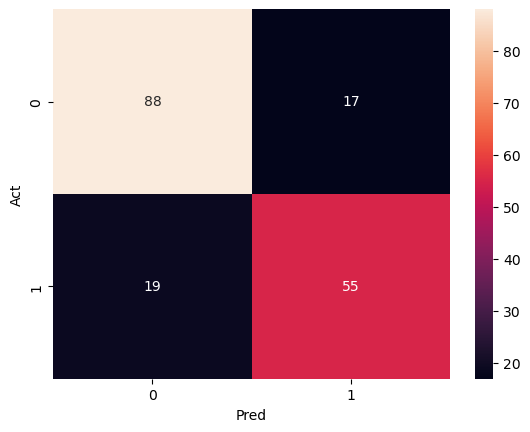

In [77]:
conf = confusion_matrix(Y_test,y_pred_test)

sns.heatmap(conf, annot=True)
plt.xlabel('Pred')
plt.ylabel('Act')
plt.show()

**Classification Report**

In [78]:
from sklearn.metrics import classification_report

In [79]:
classification_report_1 = classification_report(Y_test, y_pred_test)
print(classification_report_1)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**ROC_CURVE**

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
sigmoid_output = logistic_regression.predict_proba(X_test)[:,1]

In [82]:
auc_score = roc_auc_score(Y_test,sigmoid_output)
print(auc_score)

0.8815958815958818


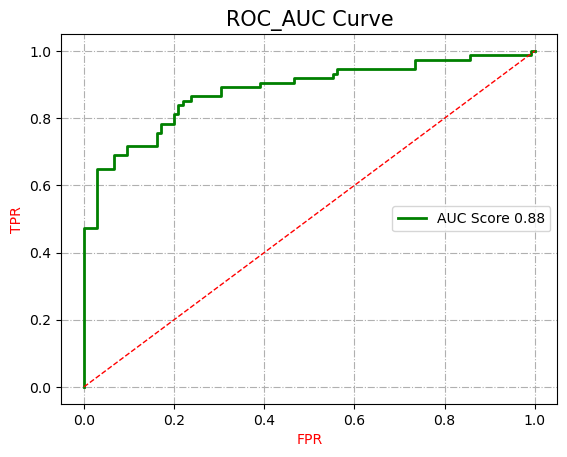

In [83]:
fpr, tpr, thres = roc_curve(Y_test, sigmoid_output)
plt.plot(fpr, tpr, linewidth = 2, color = 'green', label = f'AUC Score {auc_score:.2f}')
plt.plot([0,1], linestyle = '--', linewidth = 1, color = 'red')
plt.xlabel('FPR', size = 10, color = 'red')
plt.ylabel('TPR', size = 10, color = 'red')
plt.title('ROC_AUC Curve', size = 15)
plt.legend(loc = 'center right')
plt.grid(linestyle = '-.')
plt.show()

### save the trained model

In [90]:
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression,file)
    
    print('Model has been saved! You can make use of Streamlit to deploy the model!!')

Model has been saved! You can make use of Streamlit to deploy the model!!


## Deployement of the Model

We will be developing a web application using the streamlit framework. This will help to fast track the development of the application and loading the model for the use. 

In [88]:
# load the trained model
with open('logistic_model.pkl','rb') as file:
    model = pickle.load(file)

### Streamlit application

We will be developing the frontend of the web interface using the Streamlit Framework. 

In [94]:
%%writefile streamlit_titanic_app.py
import streamlit as st
import pandas as pd
import pickle

# -------------------------------
# Laod the trained model
# -------------------------------
# model = pickle.load(open('titanic_model.pkl','rb'))

with open('titanic_model.pkl','rb') as file:
    model = pickle.load(file)

# -------------------------------
# App Title
# -------------------------------
st.title('🚢 Titanic Survival Prediction App')
st.markdown("This Streamlit application predicts whether a Titanic passenger would survive based on the provided information.")
st.write('Enter passenger details to predict survival probability.')

# -------------------------------
# Enter Inputs
# -------------------------------
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.radio("Sex", ["Male", "Female"])
age = st.slider("Age", 1, 80, 29)
fare = st.slider("Fare", 0.0, 500.0, 32.0)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

# Encode user inputs exactly like training
sex = 1 if sex == "Male" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0

# Create DataFrame in same order as training features
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [fare],
    'encoded_male': [sex],
    'encoded_Q': [embarked_Q],
    'encoded_S': [embarked_S]
})

# -------------------------------
# Make Prediction
# -------------------------------
if st.button("Predict Survival"):
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]
    if pred == 1:
        st.success(f" Passenger would survive! (Probability: {prob:.2f})")
    else:
        st.error(f" Passenger would not survive. (Probability: {prob:.2f})")

Overwriting streamlit_titanic_app.py
